In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database, drop_database
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')

In [3]:
with open('pg_credentials.p', 'rb') as f:
    pg_credentials = pickle.load(f)

In [4]:
host     = 'localhost'
db_name  = 'goodreads_db'
username = pg_credentials['username']
password = pg_credentials['password']
port = '5432'  # default port that postgres listens on
    
con = psycopg2.connect(database = db_name, user = username, host=host, password=password)

In [5]:
query = "SELECT true_score, nratings, pub_date FROM works"
numerical_data = pd.read_sql_query(query, con)

In [6]:
numerical_data

,true_score,nratings,pub_date
0,0.00,86758,2030-01-01
1,1.00,46646,2009-07-31
2,0.00,120143,2007-04-24
3,0.00,388,1993-01-01
4,0.00,2361963,1998-01-01
...,...,...,...
1859,0.58,3512,2016-10-13
1860,0.00,12,None
1861,0.00,165678,2007-10-02
1862,0.00,18159,2002-01-01


In [36]:
import datetime
x = numerical_data['pub_date'] - datetime.date(1954,1,1)
y = np.log10(numerical_data['nratings'])

In [37]:
x = x.dt.days
x = x.fillna(0)
mask = (x>=0) & (x<x.max())

In [38]:
maxday = x[mask].max()
x = x.values/x[mask].max()

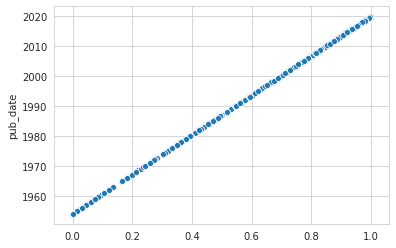

In [39]:
sns.scatterplot(x, numerical_data['pub_date'])

In [40]:
numerical_data = numerical_data[mask]

Text(0, 0.5, 'log10(nratings)')

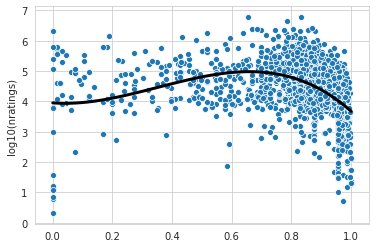

In [41]:
from numpy.polynomial import Polynomial
p = Polynomial.fit(x[mask], y[mask], 3)
#sns.boxplot(pub_year_data['pubyear'][mask].astype(int), np.log10(pub_year_data['nratings'][mask]))
sns.scatterplot(x, y)
xp, yp = p.linspace()
plt.plot(xp, yp, color='black', lw=3)
#plt.xlim((plt.gca().get_xlim()[0], plt.gca().get_xlim()[1]-1))
plt.ylabel("log10(nratings)")

In [42]:
xp[np.argmax(yp)]

0.6565656565656566

In [43]:
t = datetime.timedelta(days=xp[np.argmax(yp)]*maxday)

In [44]:
print( datetime.date(1954,1,1) + t)

1997-03-31


In [46]:
np.save("maxday.npy", maxday)

In [47]:
np.save("daypolyfit.npy", [xp, yp])